#Applied Competitive Lab in Data Science
##Exercise 1
David Guedalia

In [172]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Question 1

In [173]:
df1 = pd.read_csv("ex1.csv")

##(a)

I decided first to fill the caegorial feature to improve the contniues feature.

###Categorial Feature

I decided to Congressional District feature, because we can use state feature, as it according to this feature, so we can take the mode of the state and the city.

In [174]:
general_mode = df1['congressional_district'].mode()

In [175]:
def mode_congressional_district(x):
    if x.mode().empty:
        return general_mode
    return x.mode()[0]

In [176]:
predict_district = df1.groupby(['state', 'city_or_county']).agg({'congressional_district': lambda x: mode_congressional_district(x)}).reset_index().rename(columns={'congressional_district': 'predict_district'})

In [177]:
df1 = df1.merge(predict_district, on=['state', 'city_or_county'], how='left')

In [178]:
df1.loc[df1['congressional_district'].isnull(),'congressional_district'] = df1['predict_district']

In [179]:
df1 = df1.drop(columns=['predict_district'])

In [180]:
df1['congressional_district'].isna().sum()

0

###Continuous Feature

I decided to Latitude feature, because we can use state feature, city_or_county, and longitude as well, so we can take the mode of the state and the city.

In [181]:
df1.isnull().sum()

Unnamed: 0                      0
incident_id                     0
date                            0
state                           0
city_or_county                  0
address                      1640
n_killed                        0
n_injured                       0
congressional_district          0
gun_stolen                   9952
gun_type                     9950
incident_characteristics       29
latitude                      629
location_description        19817
longitude                     775
n_guns_involved              9950
notes                        7967
participant_age              9203
participant_age_group        4185
participant_gender           3599
participant_name            12332
participant_relationship    22365
participant_status           2784
participant_type             2523
state_house_district         3953
state_senate_district        3285
dtype: int64

In [182]:
def fix_longitude():
    df1["longitude"] = df1["longitude"].apply(lambda x : x if -180 <= float(x) <= 80 else df1["longitude"].mode()[0])

In [183]:
fix_longitude()

In [184]:
def to_float(x):
  try:
    return float(x)
  except:
    return np.nan

In [185]:
df1["latitude"] = df1["latitude"].apply(lambda x: to_float(x))

In [186]:
def fix_n_kiled():
  df1['n_killed'] = df1['n_killed'].apply(lambda x: abs(x))

In [187]:
def fix_n_injured():
  df1['n_injured'] = df1['n_injured'].apply(lambda x: abs(x))

In [188]:
fix_n_kiled()

In [189]:
fix_n_injured()

In [190]:
X = df1[['state', 'city_or_county', 'n_killed', 'n_injured', 'latitude', "longitude", "congressional_district"]]
X = pd.get_dummies(X,columns=['state', 'city_or_county'],drop_first=True)
X_lat = X[X['latitude'].notna()]
y_lat = X_lat['latitude']
X_lat = X_lat.drop(columns=['latitude'])

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_lat, y_lat, test_size=0.25)

In [192]:
rf = RandomForestRegressor(100, max_depth=15)

In [193]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15)

In [194]:
rf.score(X_train, y_train)

0.6767250153125117

In [195]:
X['predict_latitude'] = rf.predict(X.drop(columns=['latitude']))

In [196]:
df1.loc[df1['latitude'].isnull(),'latitude'] = X['predict_latitude']

There's no null values anymore on latitude. 

##(b)

I decided n_guns_involved as we can see there are few values are common, and after the 10 it becomes rare values as the 10 value have only 13 times.

In [197]:
df1['n_guns_involved'].value_counts()

1.0      12747
2.0        737
3.0        208
4.0         78
5.0         45
7.0         31
6.0         28
9.0         23
8.0         21
10.0        13
14.0        10
17.0         8
12.0         8
13.0         5
34.0         4
15.0         4
11.0         3
16.0         3
48.0         3
40.0         2
30.0         2
26.0         2
22.0         2
25.0         2
81.0         2
28.0         2
20.0         2
27.0         2
43.0         1
138.0        1
18.0         1
73.0         1
85.0         1
60.0         1
346.0        1
21.0         1
29.0         1
23.0         1
32.0         1
41.0         1
50.0         1
103.0        1
24.0         1
35.0         1
45.0         1
183.0        1
19.0         1
96.0         1
Name: n_guns_involved, dtype: int64

In [198]:
general_mode = df1['n_guns_involved'].mode()

In [199]:
def mode_n_guns_involved(x):
    if x.mode().empty:
        return general_mode
    return x.mode()[0]

In [200]:
predict_n_guns_involved = df1.groupby(['n_killed', 'n_injured']).agg({'n_guns_involved': lambda x: mode_n_guns_involved(x)}).reset_index().rename(columns={'n_guns_involved': 'predict_n_guns_involved'})

In [201]:
df1 = df1.merge(predict_n_guns_involved, on=['n_killed', 'n_injured'], how='left')
df1.loc[df1['n_guns_involved'].isnull(),'n_guns_involved'] = df1['predict_n_guns_involved']
df1 = df1.drop(columns=['predict_n_guns_involved'])
df1['n_guns_involved'].isna().sum()

0

In [202]:
list_to_ten = list(range(1, 10))
def binning_n_guns(x):
    if x in list_to_ten:
        return str(x)
    return "10 or more"

In [203]:
df1["n_guns_involved"] = df1["n_guns_involved"].apply(lambda x:binning_n_guns(x))

In [204]:
df1['n_guns_involved'].value_counts()

1.0           22697
2.0             737
3.0             208
10 or more       99
4.0              78
5.0              45
7.0              31
6.0              28
9.0              23
8.0              21
Name: n_guns_involved, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


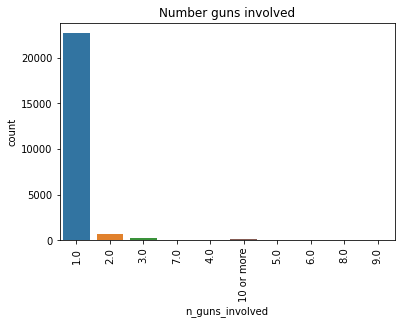

In [205]:
ax = sns.countplot("n_guns_involved",data=df1)
ax.set_title("Number guns involved")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We have new feature called - more then 10, I decided more then 10 because it make sence and there it became rare values.

#Question 2

In [206]:
df2 = pd.read_csv("ex2.csv")

In [207]:
df2.head(2)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,194704,877945,2017-06-25,California,Humboldt County (county),NaN,0,0,2.0,0::Unknown,...,NaN,NaN,0::Adult 18+,NaN,0::Manuel Robert Alvidrez,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,2.0,2.0
1,103375,467550,2015-12-15,Georgia,Gwinnett (county),NaN,0,0,7.0,0::Unknown,...,Perp is vic's ex GF's new boyfriend. Shot up m...,NaN,NaN,0::Male||1::Male,0::Eric Cotto||1::Christopher Anderson,NaN,0::Unharmed,0::Victim||1::Subject-Suspect,102.0,45.0


##(a)

## I think features that can help us analysis, can be the time exactly the crime had in hours, Then we could know when the crime is being committed, and accordingly learn about the habits of the crime.
## In addition, we could know whether different types of crimes are committed at different times

##(b)

I decided to take kaggle_income data.

I think there could be a connection between the income house and crime.
So I used aggregation to calculate the mean.

In [208]:
df_kaggle_income = pd.read_csv('kaggle_income.csv', encoding='latin-1')

In [209]:
state_income = df_kaggle_income.groupby('State_Name').agg({'Mean':'mean'}).reset_index().rename(columns={'State_Name':'state', 'Mean':'state_mean_income'})

In [210]:
df_merge = df2.merge(state_income, on='state', how='left')

In [211]:
df_merge.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,state_mean_income
0,194704,877945,2017-06-25,California,Humboldt County (county),NaN,0,0,2.0,0::Unknown,...,NaN,0::Adult 18+,NaN,0::Manuel Robert Alvidrez,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,2.0,2.0,78126.737805
1,103375,467550,2015-12-15,Georgia,Gwinnett (county),NaN,0,0,7.0,0::Unknown,...,NaN,NaN,0::Male||1::Male,0::Eric Cotto||1::Christopher Anderson,NaN,0::Unharmed,0::Victim||1::Subject-Suspect,102.0,45.0,60354.391198
2,216952,983151,2017-11-04,North Carolina,Rocky Mount,1000 Block of Niblick Dr,0,0,2.0,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,57750.104918
3,140445,626752,2016-08-11,Texas,Odessa,3939 Tanglewood Lane,0,0,11.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,0::23||1::24,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Male||3::Male||4::Male|...,NaN,2::Home Invasion - Perp Does Not Know Victim||...,0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...,0::Victim||1::Victim||2::Subject-Suspect||3::S...,81.0,31.0,65407.010435
4,72670,349392,2015-05-30,New York,Amityville,"15, 21 Rosewood Avenue",1,2,2.0,NaN,...,0::44||1::38||2::37||3::38,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Louis Wilson||1::Shaun Wilson||2::Junious W...,NaN,0::Killed||1::Injured||2::Injured||3::Unharmed...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,11.0,8.0,76201.220833


#Question 3

##(a)

I used aggregate and calculate mean - The number killed and numberinjured for state.

Also I compared it with the income I calculate on the last section.

In [212]:
df_connection = df_merge.groupby('city_or_county').agg({'n_killed':'mean', 'n_injured':'mean', 'state_mean_income': 'mean'})

This plot is mean of n_injured in state as mean house income on the state.

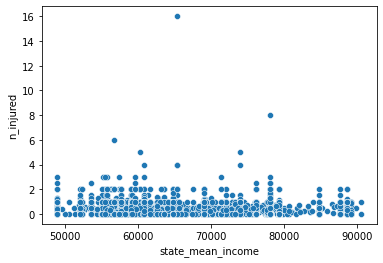

In [213]:
sns.scatterplot(x='state_mean_income', y='n_injured', data=df_connection)

This plot is mean of n_killed in state as mean house income.

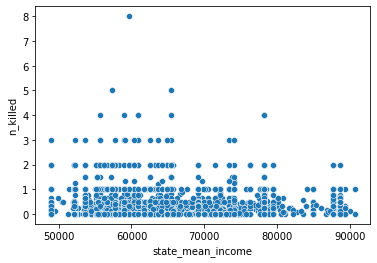

In [214]:
sns.scatterplot(x='state_mean_income', y='n_killed', data=df_connection)

In [215]:
df_connection = df_merge.groupby('state').agg({'n_killed':'max', 'n_injured':'max', 'state_mean_income': 'mean'})

This is plot of max number of killed in state as mean house income

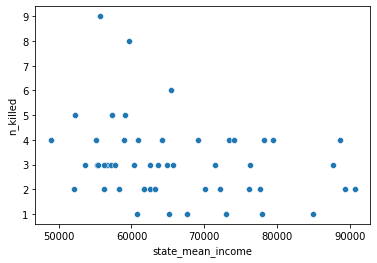

In [216]:
sns.scatterplot(x='state_mean_income', y='n_killed', data=df_connection)

This is plot of max number of injured in state as mean house income

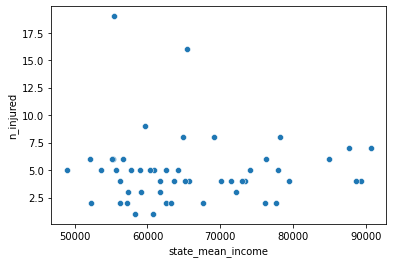

In [217]:
sns.scatterplot(x='state_mean_income', y='n_injured', data=df_connection)

##(b)

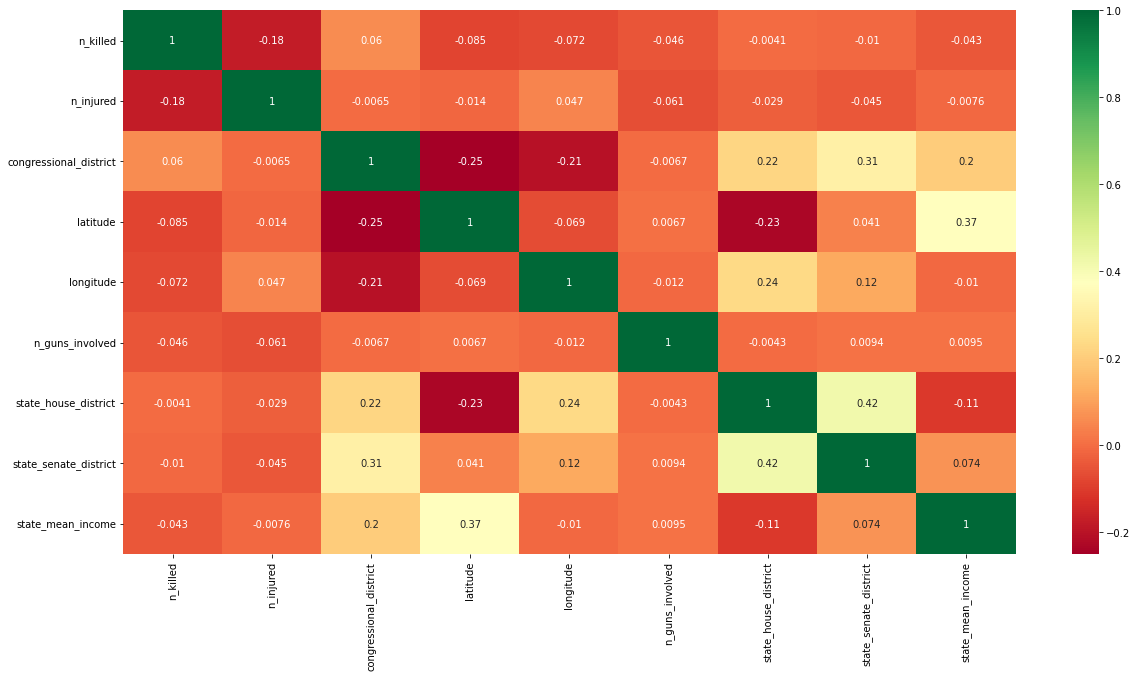

In [218]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df_merge.drop(columns=['incident_id', 'Unnamed: 0']).corr(), annot=True, cmap='RdYlGn', ax=ax)

##We looking on the correlation heatmap and we can see that the new feature we add have correlation with latitude of 0.37, which it make sence.

##Also this feature have a small correlation - 0.2 with congressional_district.

#Question 4

##(a)

In [219]:
df_covid = pd.read_csv('covid_data.csv')

In [220]:
df_covid.head(3)

,day_num,date,detected
0,1,21/02/2020,1
1,3,23/02/2020,2
2,7,27/02/2020,3


In [221]:
lr = LinearRegression()
X, y= df_covid[['day_num']], df_covid[['detected']]
lr.fit(X, y)

LinearRegression()

In [222]:
mean_squared_error(y, lr.predict(X))

1669656.317944683

##(b)

In [223]:
pred = lr.predict(X)

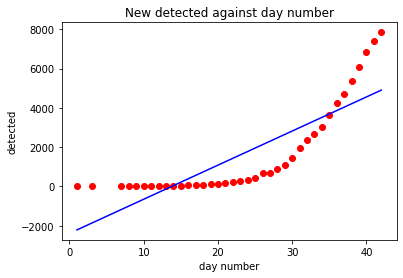

In [224]:
plt.scatter(X, y, color = "red")
plt.plot(X, pred, color = "blue")
plt.title("New detected against day number")
plt.xlabel("day number")
plt.ylabel("detected")
plt.show()

Easy to see that between 'day_num' to 'detected' the conection is not linear,

So if we will use the linear regression we gonna get bad results.
In addition we can notice that the connection is exponential.
So we will try make some transformation.

##(c)

We take log for detection feature.

In [225]:
y = np.log(y)

In [226]:
lr_log = LinearRegression()
lr_log.fit(X, y)

LinearRegression()

In [227]:
pred_log = lr_log.predict(X)

In [228]:
mean_squared_error(y, pred_log)

0.08197842668518304

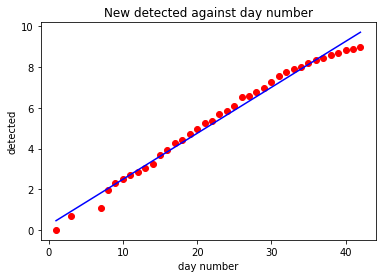

In [229]:
plt.scatter(X, y, color = "red")
plt.plot(X, pred_log, color = "blue")
plt.title("New detected against day number")
plt.xlabel("day number")
plt.ylabel("detected")
plt.show()

The MSE is around 0.08, were it is very well prediction.